<a href="https://colab.research.google.com/github/madelvallez/Cours/blob/master/NSI/Chap09/EXERCICES_Arbres_binaires_de_recherche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABR

Dans tous les exercices, on pourra utiliser le code suivant, déjà expliqué en cours : 

In [ ]:
class ABR:
    def __init__(self, val):
        self.valeur = val
        self.gauche = None
        self.droit = None

def ajoute(abr, val):
    '''abr est un arbre binaire de recherche, instance de classe ABR
    val est une valeur du même type que les valeurs de abr
    la fonction ajoute val dans abr '''
    if val < abr.valeur : 
        if abr.gauche is None : 
            abr.gauche = ABR(val)
        else : 
            ajoute(abr.gauche, val)
    else : 
        if abr.droit is None :
            abr.droit = ABR(val)
        else : 
            ajoute(abr.droit, val)

def parcours_infixe_indent(arbre,n=0):
    '''affiche le contenu d'un arbre :
    - d'abord le sous-arbre droit, 
    - puis la racine, 
    - puis le sous-arbre gauche'''
    if arbre is not None:
        parcours_infixe_indent(arbre.droit,n+1)
        print('    '*n+'-', arbre.valeur)
        parcours_infixe_indent(arbre.gauche,n+1)

def parcours_infixe(arbre):
    '''affiche le contenu d'un arbre :
    - d'abord le sous-arbre gauche, 
    - puis la racine, 
    - puis le sous-arbre droit'''
    if arbre is not None:
        parcours_infixe(arbre.gauche)
        print(arbre.valeur, end=' ')
        parcours_infixe(arbre.droit)

def recherche(abr,x):
    '''renvoie True si x est l'une des valeurs contenues dans abr
    renvoie False sinon'''
    if abr is None:
        return False
    elif x < abr.valeur:
        print(abr.valeur)
        return recherche(abr.gauche, x)
    elif x > abr.valeur : 
        print(abr.valeur)
        return recherche(abr.droit,x)
    else:
        print(abr.valeur)
        return True

def taille(arbre):
    if arbre is None:
        return 0
    else:
        return 1 + taille(arbre.gauche) + taille(arbre.droit)

def hauteur(arbre):
    if arbre is None : 
        return 0
    else : return 1 + max(hauteur(arbre.gauche), hauteur(arbre.droit))

# Exercice 1 : sur feuille, puis avec Python

1. Sans exécuter le code : déterminer la taille et la hauteur des arbre binaires de recherche définis dans les cellules ci-dessous
2. Vérifier ensuite avec Python...

In [ ]:
a1 = ABR(100)
for v in [50,200,150,300,250]:
    ajoute(a1,v)
# taille = 6
# hauteur = 4
print('taille= ',taille(a1),'\nhauteur= ',hauteur(a1))

taille=  6 
hauteur=  4


In [ ]:
a2 = ABR(100)
for v in [50,150,200,250,300]:
    ajoute(a2,v)
# taille = 6
# hauteur = 5
print('taille= ',taille(a2),'\nhauteur= ',hauteur(a2))

taille=  6 
hauteur=  5


In [ ]:
a3 = ABR(300)
for v in [250,200,150,100,50]:
    ajoute(a3,v)
# taille = 6
# hauteur = 6
print('taille= ',taille(a3),'\nhauteur= ',hauteur(a3))

taille=  6 
hauteur=  6


# Exercice 2 : sur feuille!

Représenter tous les arbres binaires de recherche de taille 3 contenant les clés (ou valeurs) 1,2 et 3.

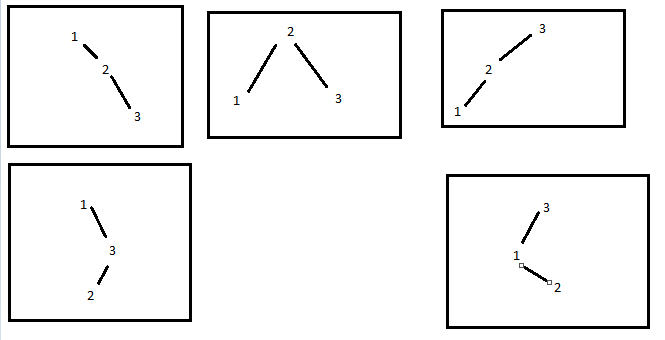

# Exercice 3 : avec Python

1. Dans un arbre binaire de recherche, où se trouve le plus petit élément ? => Le noeud le plus petit est **le plus à gauche**
2. En déduire une fonction `minimum(abr)` qui :
  * prend en argument un arbre binaire de recherche
  * renvoie `None` si cet arbre est vide
  * renvoie la **plus petite valeur** contenue dans cet arbre sinon. 
3. Écrire de même une fonction `maximum(abr)` qui renvoie la **plus grande valeur** contenue dans `abr`, et qui renvoie `None` lorsque `abr` est vide.

In [ ]:
def minimum(abr):
    if abr is None:
        return None
    elif abr.gauche is None:
        return abr.valeur
    return minimum(abr.gauche)
    
assert minimum(a1)==50
assert minimum(a2)==50
assert minimum(a3)==50
print('test OK')

test OK


**Remarque:** pour la fonction `maximum(abr)` il suffit de reprendre `minimum` et remplacer `gauche` par `droite`.

# Exercice 4 : sur feuille!

On considère les arbres binaires définis par le code Python suivant : 

In [ ]:
class Noeud:
    def __init__(self, g, v, d):
        self.gauche = g
        self.valeur = v        
        self.droit  = d
    
arb1 = Noeud(Noeud(None,
                    50,
                    Noeud(None,
                          75,
                          None)), 
             100, 
             Noeud(None,
                   150,
                   None) )


arb2 = Noeud( Noeud(None,
                    50,
                    None), 
             100, 
             Noeud(Noeud(None,
                          75,
                          None),
                   150,
                   None) )

1. `arb1` est-il un arbre binaire de recherche ? 

=> `abr1` est un arbre binaire de recherche car les valeurs des noeuds respecte la règle "les noeuds à gauche sont inférieur à la valeur du noeud" MAIS c'est pas la bonne classe...

2. `arb2` est-il un arbre binaire de recherche ?

=> `abr2` n'est pas un arbre binaire de recherche car TOUTES les valeurs à droite de **100 doivent être supérieures** et 75 devrait être à gauche de 100.

# Exercice 5 : sur feuille!

On recherche le nombre 28 dans un arbre binaire de recherche : 
1. Est-il possible que la suite des noeuds parcourus soit : 13, 22, 35, 31, 29, 23, 25, 28

=> Il est possible car la struture est valide

2. Est-il possible que la suite des noeuds parcourus soit : 13, 23, 35, 31, 29, 22, 25, 28

=> En naviguant dans l'arbre, 22 ne peut pas se trouver dans la branche droite de 23 -> on n'aurait pas croisé 22

In [ ]:
abr51=ABR(13)
ajoute(abr51,22)
ajoute(abr51,35)
ajoute(abr51,31)
ajoute(abr51,29)
ajoute(abr51,23)
ajoute(abr51,25)
ajoute(abr51,28)

abr52=ABR(13)
ajoute(abr52,23)
ajoute(abr52,35)
ajoute(abr52,31)
ajoute(abr52,29)
ajoute(abr52,22)
ajoute(abr52,25)
ajoute(abr52,28)

recherche(abr51,28)
print('---------')
recherche(abr52,28)
print('abr51:')
parcours_infixe_indent(abr51)
print('abr52:')
parcours_infixe_indent(abr52)

13
22
35
31
29
23
25
28
---------
13
23
35
31
29
25
28
abr51:
        - 35
            - 31
                - 29
                            - 28
                        - 25
                    - 23
    - 22
- 13
abr52:
        - 35
            - 31
                - 29
                        - 28
                    - 25
    - 23
        - 22
- 13
